# Detect Outliers

Some datasets that will be used for training or testing your model contain outliers. Since these outliers have a low probability of appearing in real world data, they will give you a bad model or wrong test results. In order to prevent this, you can detect and then remove these outliers via the Isolation Forest method.

In [21]:
# Load packages
import numpy as np 
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

In [22]:
# Load data from the csv file
df = pd.read_csv("housing.csv", index_col=False)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,5.33,36.2


After the data is loaded, you can build and apply the Isolation Forest classifier with the help of the `IsolationForest` algorithm from the `sklearn` package.

In [23]:
CONTAMINATION=.2    # The expected outliers to real data ratio
BOOTSTRAP = False   # True if you want to use the bootstrap method; 

# Exctract the data without column names from the dataframe
data = df.values

# We will start by splitting the data into X/y train/test data
X, y = data[:, :-1], data[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Next, we will set up the Isolation Forest classifier that will detect the outliers
i_forest = IsolationForest(contamination=CONTAMINATION, bootstrap=BOOTSTRAP)
is_inlier = i_forest.fit_predict(X_train)    # +1 if inlier, -1 if outlier

# Finally, we will select the rows without outliers
mask = is_inlier != -1
# and remove these from the train data
X_train, y_train = X_train[mask, :], y_train[mask]

Before you write this data without outliers to a new csv file, you should first check the results from the average number of rooms (RM) column via two boxplots.

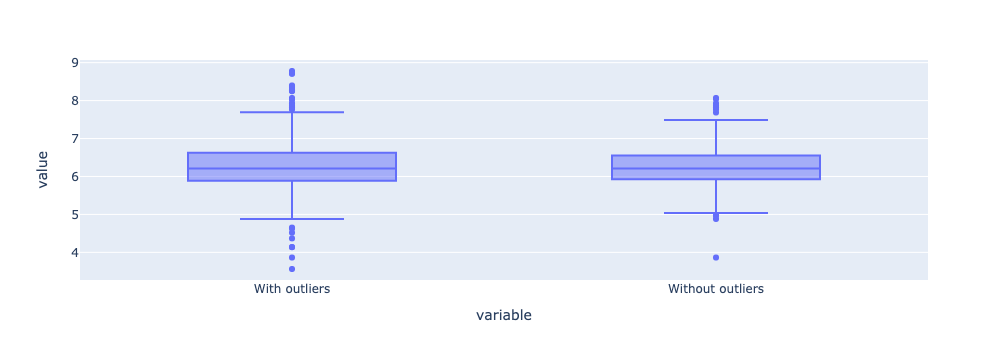

In [24]:
df_wo_outliers=pd.DataFrame(X_train, columns=df.columns[:-1])
df_boxplot = pd.DataFrame(data={'With outliers':df['RM'], 'Without outliers':df_wo_outliers['RM']})
fig = px.box(df_boxplot)
fig.show()

As you can see, a vast majority of the outliers are removed from this RM column. You can also check it for other columns. If you want more/less outliers to be removed, you can increase/decrease the `CONTAMINATION`.  
You can now write this dataframe to a csv file.

In [25]:
df_wo_outliers.to_csv('housing_wo_outliers.csv')

### Dataset source
[housing.csv](https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv)